In [ ]:
import pandas as pd
import numpy as np

In [ ]:
delivery = pd.read_csv('/content/deliveries.csv')
match = pd.read_csv('/content/matches.csv')

print(delivery.head())
print(match.head())

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

In [ ]:
match.shape

(1095, 20)

In [ ]:
delivery.shape

(260920, 17)

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']], left_on='id', right_on='match_id')
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [ ]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
teams = ['Royal Challengers Bangalore','Punjab Kings','Lucknow Super Giants',
         'Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad',
         'Gujarat Titans','Kolkata Knight Riders','Chennai Super Kings'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df = match_df[match_df['team1'].isin(teams)]
match_Df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(934, 22)

In [ ]:
match_df.sample(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
809,1216530,2020/21,NaN,2020-11-01,League,PJ Cummins,Dubai International Cricket Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,...,runs,60.0,192.0,20.0,N,NaN,Nitin Menon,PR Reiffel,1216530,191
51,336036,2007/08,Jaipur,2008-05-26,League,Sohail Tanvir,Sawai Mansingh Stadium,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,...,wickets,5.0,146.0,20.0,N,NaN,BF Bowden,K Hariharan,336036,145
777,1216542,2020/21,NaN,2020-10-08,League,JM Bairstow,Dubai International Cricket Stadium,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,...,runs,69.0,202.0,20.0,N,NaN,AK Chaudhary,Nitin Menon,1216542,201
245,501269,2011,Mumbai,2011-05-25,Elimination Final,MM Patel,Wankhede Stadium,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,...,wickets,4.0,148.0,20.0,N,NaN,Asad Rauf,SJA Taufel,501269,147
419,733973,2014,Mumbai,2014-05-03,League,CJ Anderson,Wankhede Stadium,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,...,wickets,5.0,169.0,20.0,N,NaN,BNJ Oxenford,C Shamshuddin,733973,168


In [ ]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [ ]:
match_df = match_df[['match_id','winner','city','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df.shape

(107377, 20)

In [ ]:
def trim_after_chase(group):
    target = group['total_runs_x'].iloc[0]
    group['cumsum'] = group['total_runs_y'].cumsum()
    return group[group['cumsum'] <= target]

delivery_df = delivery_df.groupby('match_id').apply(trim_after_chase).reset_index(drop=True)

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum().astype(int)
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
delivery_df['runs_left'] = delivery_df['runs_left'].clip(lower=0)
delivery_df

<ipython-input-18-886af401eefb>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delivery_df = delivery_df.groupby('match_id').apply(trim_after_chase).reset_index(drop=True)


,match_id,winner,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,cumsum,current_score,runs_left
0,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,1,221
1,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,2,220
2,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,2,220
3,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,3,219
4,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,4,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106880,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,4,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,109,109,4
106881,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,110,3
106882,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,111,2
106883,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,112,1


In [ ]:
delivery_df['balls_left'] = 120 - (delivery_df['over'] * 6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,winner,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,cumsum,current_score,runs_left,balls_left
0,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,NaN,NaN,NaN,1,1,221,119
1,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,NaN,NaN,NaN,2,2,220,118
2,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,NaN,NaN,NaN,2,2,220,117
3,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,NaN,NaN,NaN,3,3,219,116
4,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,NaN,NaN,NaN,4,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106880,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,4,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,109,109,4,62
106881,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,NaN,NaN,NaN,110,110,3,61
106882,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,111,111,2,60
106883,1426312,Kolkata Knight Riders,Chennai,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,NaN,NaN,NaN,112,112,1,59


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: "1" if x != "0" else "0")

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)

delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['player_dismissed'].cumsum()

delivery_df.head()


,match_id,winner,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,cumsum,current_score,runs_left,balls_left,wickets
0,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,1,221,119,10
1,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,NaN,NaN,2,2,220,118,10
2,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,NaN,NaN,2,2,220,117,10
3,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,NaN,NaN,3,3,219,116,10
4,335982,Kolkata Knight Riders,Bangalore,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,NaN,NaN,4,4,218,115,10


In [ ]:
delivery_df.columns

Index(['match_id', 'winner', 'city', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'cumsum',
       'current_score', 'runs_left', 'balls_left', 'wickets'],
      dtype='object')

In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df.sample(5)

,match_id,winner,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,cumsum,current_score,runs_left,balls_left,wickets,crr
84051,1304060,Kolkata Knight Riders,Pune,161,2,Kolkata Knight Riders,Mumbai Indians,0,6,VR Iyer,...,0,0,NaN,NaN,3,3,158,114,10,3.000000
20408,501232,Royal Challengers Bangalore,Bangalore,181,2,Pune Warriors,Royal Challengers Bangalore,8,5,MK Pandey,...,0,0,NaN,NaN,59,59,122,67,9,6.679245
38156,729299,Kolkata Knight Riders,NaN,150,2,Royal Challengers Bangalore,Kolkata Knight Riders,3,5,YV Takawale,...,0,0,NaN,NaN,33,33,117,97,10,8.608696
23658,548308,Pune Warriors,Mumbai,129,2,Mumbai Indians,Pune Warriors,16,5,Harbhajan Singh,...,0,0,NaN,NaN,84,84,45,19,4,4.990099
82953,1304050,Gujarat Titans,Mumbai,158,2,Gujarat Titans,Lucknow Super Giants,16,6,R Tewatia,...,0,0,NaN,NaN,130,130,28,18,6,7.647059


In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df.sample(5)

,match_id,winner,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,cumsum,current_score,runs_left,balls_left,wickets,crr,rrr
79114,1254088,Mumbai Indians,Abu Dhabi,235,2,Sunrisers Hyderabad,Mumbai Indians,7,3,Mohammad Nabi,...,0,NaN,NaN,82,82,153,75,8,10.933333,12.240000
14158,419132,Mumbai Indians,Mumbai,163,2,Mumbai Indians,Kings XI Punjab,7,3,KA Pollard,...,0,NaN,NaN,59,59,104,75,9,7.866667,8.320000
44749,829739,Kolkata Knight Riders,Delhi,146,2,Kolkata Knight Riders,Delhi Daredevils,0,5,G Gambhir,...,0,NaN,NaN,5,5,141,115,10,6.000000,7.356522
89721,1304108,Gujarat Titans,Mumbai,133,2,Gujarat Titans,Chennai Super Kings,18,5,DA Miller,...,0,NaN,NaN,132,132,1,7,7,7.008850,0.857143
103069,1426271,Mumbai Indians,Mohali,192,2,Punjab Kings,Mumbai Indians,3,4,Harpreet Singh,...,0,NaN,NaN,26,26,166,98,6,7.090909,10.163265


In [ ]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)
delivery_df.sample(5)

,match_id,winner,city,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,dismissal_kind,fielder,cumsum,current_score,runs_left,balls_left,wickets,crr,rrr,result
69361,1216492,Chennai Super Kings,Abu Dhabi,162,2,Chennai Super Kings,Mumbai Indians,15,1,F du Plessis,...,NaN,NaN,117,117,45,29,8,7.714286,9.310345,1
91819,1359480,Chennai Super Kings,Chennai,217,2,Lucknow Super Giants,Chennai Super Kings,13,7,A Badoni,...,NaN,NaN,136,136,81,35,5,9.600000,13.885714,0
49127,980909,Mumbai Indians,Kolkata,187,2,Mumbai Indians,Kolkata Knight Riders,10,2,RG Sharma,...,NaN,NaN,88,88,99,58,8,8.516129,10.241379,1
54492,1082611,Sunrisers Hyderabad,Hyderabad,191,2,Delhi Daredevils,Sunrisers Hyderabad,18,5,SS Iyer,...,NaN,NaN,167,167,24,7,6,8.867257,20.571429,0
105037,1426288,Sunrisers Hyderabad,Hyderabad,201,2,Rajasthan Royals,Sunrisers Hyderabad,16,5,R Powell,...,NaN,NaN,170,170,31,19,6,10.099010,9.789474,0


In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,5284
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,12
result,0


In [ ]:
final_df.shape

(106885, 10)

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df.shape

(101592, 10)

In [ ]:
final_df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,101592.000000,101592.000000,101592.000000,101592.000000,101592.000000,1.015920e+05,101592.000000
mean,93.775248,62.964436,7.507461,168.017019,7.597364,inf,0.510385
std,50.679057,33.342554,2.173446,31.159361,2.384005,NaN,0.499895
min,0.000000,-3.000000,0.000000,62.000000,0.000000,-5.100000e+02,0.000000
25%,54.000000,35.000000,6.000000,148.000000,6.368421,7.200000e+00,0.000000
50%,92.000000,64.000000,8.000000,167.000000,7.593750,8.968081e+00,1.000000
75%,131.000000,92.000000,9.000000,188.000000,8.865672,1.111945e+01,1.000000
max,286.000000,119.000000,10.000000,287.000000,36.000000,inf,1.000000


In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
final_df.shape

(101275, 10)

In [ ]:
from sklearn.model_selection import train_test_split

x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)


In [ ]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
41639,Rajasthan Royals,Mumbai Indians,Ahmedabad,109,56,4,178,6.468750,11.678571
13960,Deccan Chargers,Mumbai Indians,Mumbai,70,39,4,172,7.555556,10.769231
93691,Mumbai Indians,Kolkata Knight Riders,Mumbai,91,70,8,185,11.280000,7.800000
43123,Kolkata Knight Riders,Mumbai Indians,Kolkata,98,69,9,168,8.235294,8.521739
46599,Royal Challengers Bangalore,Chennai Super Kings,Chennai,24,6,2,148,6.526316,24.000000
...,...,...,...,...,...,...,...,...,...
47004,Rajasthan Royals,Sunrisers Hyderabad,Mumbai,115,50,6,201,7.371429,13.800000
53545,Mumbai Indians,Royal Challengers Bangalore,Bangalore,132,96,6,142,2.500000,8.250000
82913,Gujarat Titans,Lucknow Super Giants,Mumbai,86,58,7,158,6.967742,8.896552
66273,Mumbai Indians,Royal Challengers Bangalore,Mumbai,117,90,10,171,10.800000,7.800000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


trf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
], remainder='passthrough')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8134781535423352

In [ ]:
pipe.predict_proba(x_test)[10]


array([0.94150153, 0.05849847])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:
import numpy as np

def match_progression(x_df, match_id, pipe):
    if match_id not in x_df['match_id'].values:
        print(f"Match ID '{match_id}' not found. Please enter a valid match ID.")
        return None, None

    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]

    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]

    if temp_df.empty:
        print(f"No valid data found for Match ID '{match_id}' after filtering.")
        return None, None

    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100, 1)
    temp_df['win'] = np.round(result.T[1]*100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]

    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)

    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]

    print("Target -", target)

    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    return temp_df, target


In [ ]:
temp_df,target = match_progression(delivery_df,1359480,pipe)
temp_df

Target - 217


,end_of_over,runs_after_over,wickets_in_over,lose,win
91733,1,7,0,96.8,3.2
91739,2,18,0,91.4,8.6
91745,3,13,0,87.2,12.8
91752,4,6,0,87.7,12.3
91763,5,25,0,66.3,33.7
91770,6,11,1,72.8,27.2
91776,7,2,1,86.7,13.3
91782,8,2,1,94.0,6.0
91788,9,12,0,91.3,8.7
91794,10,9,1,94.1,5.9


Text(0.5, 1.0, 'Target-217')

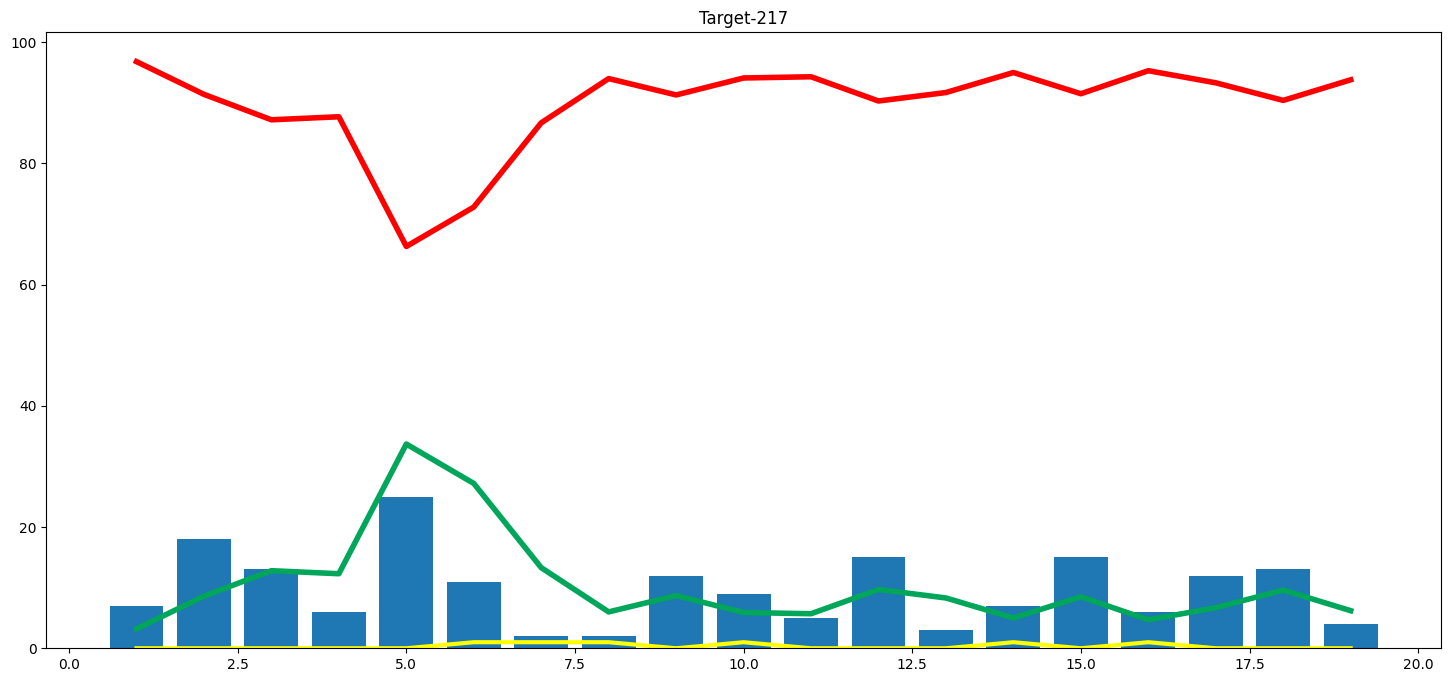

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams

['Royal Challengers Bangalore',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Gujarat Titans',
 'Kolkata Knight Riders',
 'Chennai Super Kings']

In [ ]:
delivery_df['city'].unique()


array(['Bangalore', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur', 'Hyderabad',
       'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Visakhapatnam', 'Pune',
       'Raipur', 'Ranchi', 'Abu Dhabi', nan, 'Bengaluru', 'Chandigarh',
       'Indore', 'Sharjah', 'Dubai', 'Navi Mumbai', 'Lucknow', 'Guwahati',
       'Dharamsala', 'Mohali'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))